<a href="https://colab.research.google.com/github/anna030608/DS/blob/master/Quest/260209_House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주택 가격 예측하기!

메인퀘스트에 오신 것을 환영합니다!

이번 퀘스트의 목표는 여러 특성들을 종합적으로 고려하여 가장 주택 가격을 잘 예측하는 회귀모델을 만드는 것입니다.

- 예측할 값(y): SalePrice
- 평가지표: RMSE

퀘스트 진행 방식:

1. Code 란에서 테스트 노트북을 Copy&Edit 하여 작업!
2. 테스트 노트북을 submit 하여 리더보드에 정상적으로 등록되는지 확인하기
3. 자유롭게 모델을 발전시켜 좋은 성적 거두기!
4. 정상적으로 submit하고, 다음 구글폼에 이름/노트북주소/닉네임 등록!!!
- https://docs.google.com/forms/d/e/1FAIpQLSc0kXVZ9PRLbjsxBysCSSYLDiU4Hd9DLTvFrCFep4HLZLbL8w/viewform?usp=header

예시 형식:
~~~
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
~~~

### 데이터 확인 및 불러오기

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

특성이 너무 많습니다! 어떻게 하면 좋을까요?

참고로 각각의 특성은 다음을 나타냅니다.

| 변수명               | 설명 (한국어)                         |
| ----------------- | -------------------------------- |
| **SalePrice**     | 주택의 판매 가격(달러). 예측해야 하는 타겟 변수     |
| **MSSubClass**    | 건물 등급(건물 종류 분류)                  |
| **MSZoning**      | 토지 용도 구분(일반적인 구역 분류)             |
| **LotFrontage**   | 도로에 접한 토지 길이 (피트 단위)             |
| **LotArea**       | 토지 면적 (평방 피트)                    |
| **Street**        | 도로 접근 방식                         |
| **Alley**         | 골목(후면 도로) 접근 방식                  |
| **LotShape**      | 토지의 전반적인 모양                      |
| **LandContour**   | 토지의 평탄도                          |
| **Utilities**     | 사용 가능한 공공시설(전기, 수도 등)            |
| **LotConfig**     | 토지 배치 형태                         |
| **LandSlope**     | 토지의 경사도                          |
| **Neighborhood**  | Ames 시 내의 물리적 위치(주변 지역)          |
| **Condition1**    | 주요 도로·철도에 대한 근접도                 |
| **Condition2**    | 두 번째 주요 도로·철도에 대한 근접도            |
| **BldgType**      | 주거 건물 유형 (단독, 다세대 등)             |
| **HouseStyle**    | 주택의 건축 양식                        |
| **OverallQual**   | 자재 및 마감 품질 종합 평가                 |
| **OverallCond**   | 주택의 전반적인 상태 평가                   |
| **YearBuilt**     | 최초 건축 연도                         |
| **YearRemodAdd**  | 리모델링/개조 연도                       |
| **RoofStyle**     | 지붕 스타일                           |
| **RoofMatl**      | 지붕 재료                            |
| **Exterior1st**   | 외장 마감재(주 재료)                     |
| **Exterior2nd**   | 외장 마감재(보조 재료, 2번째)               |
| **MasVnrType**    | 석조 베니어 타입                        |
| **MasVnrArea**    | 석조 베니어 면적 (평방 피트)                |
| **ExterQual**     | 외장재 품질 평가                        |
| **ExterCond**     | 외장재 상태 평가                        |
| **Foundation**    | 기초(Foundation) 유형                |
| **BsmtQual**      | 지하실 높이 평가                        |
| **BsmtCond**      | 지하실 상태 평가                        |
| **BsmtExposure**  | 지하실 외부 노출 여부(출입구/창문 등)           |
| **BsmtFinType1**  | 주요 지하실 마감 구역 유형                  |
| **BsmtFinSF1**    | 주요 지하실 마감 면적 (평방 피트)             |
| **BsmtFinType2**  | 보조 지하실 마감 구역 유형                  |
| **BsmtFinSF2**    | 보조 지하실 마감 면적 (평방 피트)             |
| **BsmtUnfSF**     | 미완성 지하실 면적 (평방 피트)               |
| **TotalBsmtSF**   | 지하실 전체 면적 (평방 피트)                |
| **Heating**       | 난방 시스템 종류                        |
| **HeatingQC**     | 난방 품질 및 상태                       |
| **CentralAir**    | 중앙 에어컨 설치 여부                     |
| **Electrical**    | 전기 시스템 종류                        |
| **1stFlrSF**      | 1층 면적 (평방 피트)                    |
| **2ndFlrSF**      | 2층 면적 (평방 피트)                    |
| **LowQualFinSF**  | 저품질 마감 공간 면적 (전체 층 합산)           |
| **GrLivArea**     | 지상(Above grade) 생활 공간 면적 (평방 피트) |
| **BsmtFullBath**  | 지하실 완비 욕실 수                      |
| **BsmtHalfBath**  | 지하실 반 욕실 수                       |
| **FullBath**      | 지상 완비 욕실 수                       |
| **HalfBath**      | 지상 반 욕실 수                        |
| **Bedroom**       | 지하실 제외 침실 수                      |
| **Kitchen**       | 주방 수                             |
| **KitchenQual**   | 주방 품질                            |
| **TotRmsAbvGrd**  | 지상 전체 방 개수 (욕실 제외)               |
| **Functional**    | 주택 기능성 평가                        |
| **Fireplaces**    | 벽난로 개수                           |
| **FireplaceQu**   | 벽난로 품질                           |
| **GarageType**    | 차고 위치(유형)                        |
| **GarageYrBlt**   | 차고 건축 연도                         |
| **GarageFinish**  | 차고 내부 마감 상태                      |
| **GarageCars**    | 차고 크기 (주차 가능 차량 수)               |
| **GarageArea**    | 차고 면적 (평방 피트)                    |
| **GarageQual**    | 차고 품질                            |
| **GarageCond**    | 차고 상태                            |
| **PavedDrive**    | 포장 진입로 여부                        |
| **WoodDeckSF**    | 목재 데크 면적 (평방 피트)                 |
| **OpenPorchSF**   | 오픈 현관 면적 (평방 피트)                 |
| **EnclosedPorch** | 밀폐된 현관 면적 (평방 피트)                |
| **3SsnPorch**     | 3계절용 현관 면적 (평방 피트)               |
| **ScreenPorch**   | 스크린 현관 면적 (평방 피트)                |
| **PoolArea**      | 수영장 면적 (평방 피트)                   |
| **PoolQC**        | 수영장 품질                           |
| **Fence**         | 울타리 품질                           |
| **MiscFeature**   | 기타 특수 기능                         |
| **MiscVal**       | 기타 기능의 금전적 가치                    |
| **MoSold**        | 판매 월                             |
| **YrSold**        | 판매 연도                            |
| **SaleType**      | 판매 유형                            |
| **SaleCondition** | 판매 조건                            |


In [5]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [6]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### SalePrice 분포 확인!!!

- 오른쪽으로 긴 꼬리 형태
  - 저가 주택은 많고, 고가 주택은 소수임!

- 정규분포가 아님.

- 이상치 -> 400000~700000...
---
=> SalePrice 분포 확인 결과, RMSE 기준으로 판단하기 위해선 로그 변환 / 스케일 조정이 필요하다고 판단함.

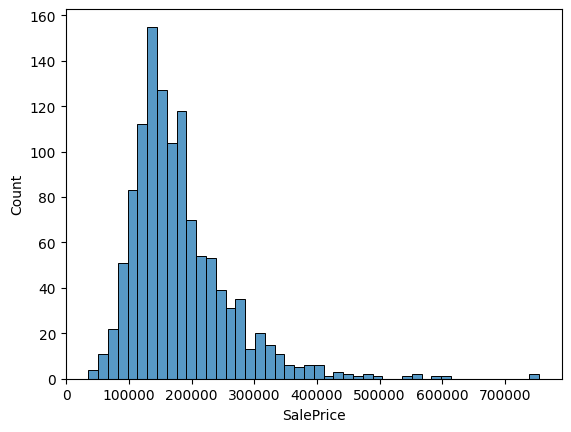

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train_df["SalePrice"])
plt.show()

### log(SalePrice) 분포 확인!!

- 오른쪽의 꼬리 사라짐.
- 정규 분포 모양에 가까워짐.
- 고가 주택의 영향을 조금 완화함.

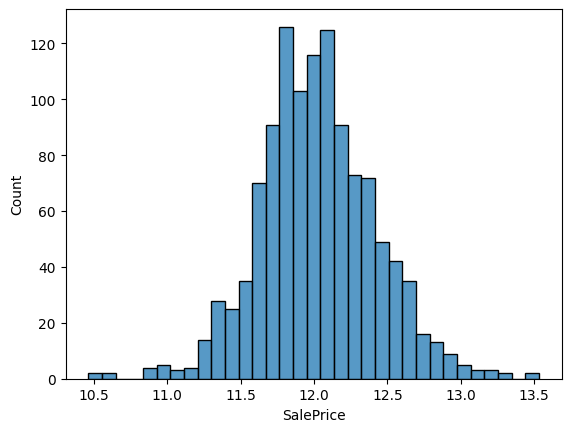

In [8]:
### log(SalePrice) 분포 확인.

sns.histplot(np.log1p(train_df["SalePrice"]))
plt.show()

### 다른 변수 분포 확인!

- 도메인 지식을 활용하여, 집값과 가장 관련 있을 것 같은 변수들만 뽑아 시각화를 진행함.

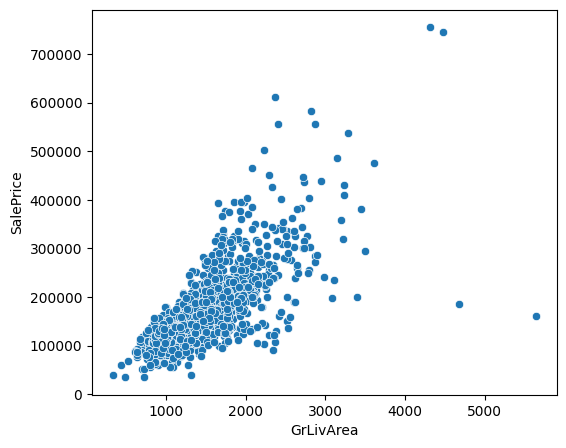

In [9]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=train_df['GrLivArea'],
    y=train_df['SalePrice']
)
plt.show()

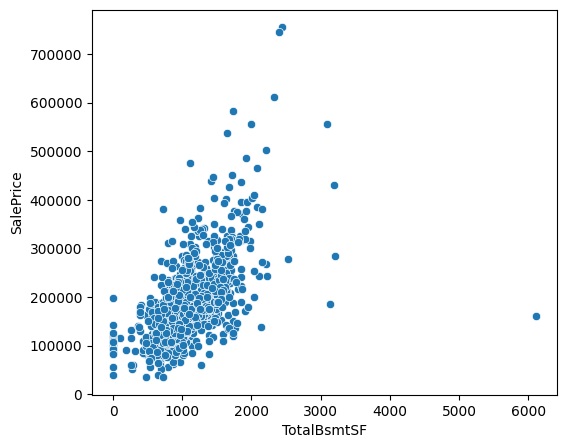

In [10]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=train_df['TotalBsmtSF'],
    y=train_df['SalePrice']
)
plt.show()

- 전반적으로 면적이 커질수록 집값이 증가함.
- 면적이 매우 큰데, 집값이 상대적으로 싼 집이 있음 -? 이상치 확인 필요!
- 면적이 커질수록, 분산이 증가함.
  - 로그 변환 필요하다고 판단!

---

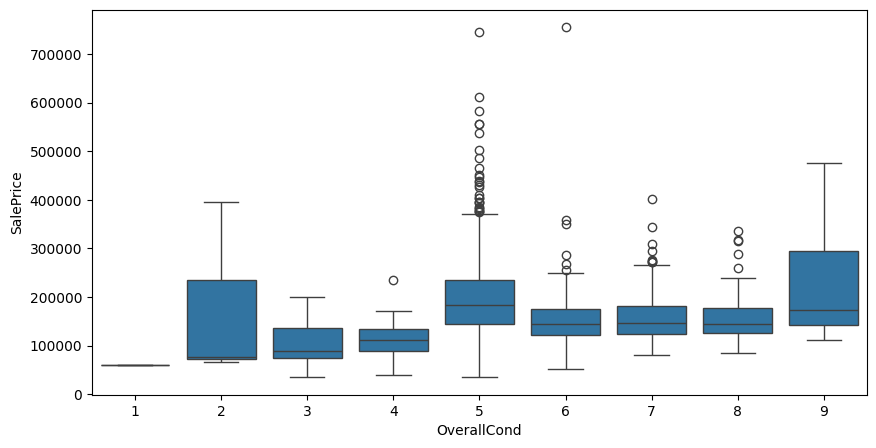

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x=train_df['OverallCond'],
    y=train_df['SalePrice']
)
plt.show()

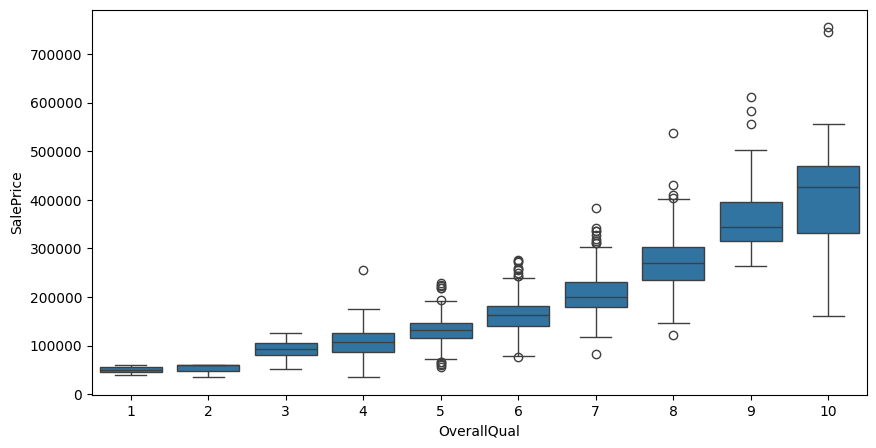

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x=train_df['OverallQual'],
    y=train_df['SalePrice']
)

plt.show()

- OverallQual 이 1->10으로 증가할수록, salePrice 중앙값이 상승.
- 같은 면적이더라도, 품질에 따라 가격이 달라짐.
- OverallQual -> one-hot encoding은 하면 안됨! (순서 정보가 중요하기 때문.)

---

### 전처리

전처리에서 고민해야 할 것은 많습니다.

1. 결측치
2. 이상치

결측치는 처리하지 않으면 학습 자체가 불가할 수 있기 때문에, 최소한의 전처리로 결측치를 처리하겠습니다.

여러분들이라면 어떻게 결측치를 처리하면 좋을지 고민해보세요!

In [13]:
missing_cnt = train_df.isnull().sum()
missing_cnt = missing_cnt[missing_cnt > 0].sort_values(ascending=False)
missing_cnt

,0
PoolQC,1162
MiscFeature,1120
Alley,1098
Fence,941
MasVnrType,694
FireplaceQu,545
LotFrontage,218
GarageType,69
GarageYrBlt,69
GarageFinish,69


In [14]:
missing_mean = train_df.isnull().mean()
missing_mean = missing_mean[missing_mean > 0].sort_values(ascending=False)
missing_mean

,0
PoolQC,0.994863
MiscFeature,0.958904
Alley,0.940068
Fence,0.805651
MasVnrType,0.594178
FireplaceQu,0.466610
LotFrontage,0.186644
GarageType,0.059075
GarageYrBlt,0.059075
GarageFinish,0.059075


### 결측률이 높은 컬럼을 그냥 삭제해도 될지 검증!

- PoolQC는 수영장 품질 컬럼인데, 결측률이 99%인데,
- 수영장 면적을 나타내는 컬럼 PoolArea는 결측이 없다.

-> PoolArea = 0 이라서 PoolQC 값이 없어서 결측치가 많은건지를 검증하고 싶었음.

---
=> 확인 결과, PoolQC 결측은 "수영장이 없음" 이라는 정보를 담고 있음. -> 무작정 삭제 X.

In [15]:
# PoolQC가 결측인 행에서 PoolArea 분포 확인
train_df.loc[train_df['PoolQC'].isnull(), 'PoolArea'].value_counts()

,count
PoolArea,
0,1162


#### 구조적인 결측 -> "None"으로 채우기.
- 위와 같이 시설이 아예 없는 경우..

In [16]:
none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence',
    'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]

for col in none_cols:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

#### 수치형 결측 -> 중앙값.
- 이상치가 아직 존재하기 때문에 평균말고 중앙값으로 처리하여 안전하게 해결하려고 했다.

In [17]:
num_fill_cols = [
    'LotFrontage',
    'MasVnrArea',
    'GarageYrBlt'
]

for col in num_fill_cols:
    median_value = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_value)
    test_df[col] = test_df[col].fillna(median_value)

#### 결측치 극소수인 컬럼 -> 최빈값

In [18]:
train_df['Electrical'] = train_df['Electrical'].fillna(
    train_df['Electrical'].mode()[0]
)
test_df['Electrical'] = test_df['Electrical'].fillna(
    train_df['Electrical'].mode()[0]
)

In [ ]:
#### 결측치 처리 확인.

In [19]:
missing_cnt = train_df.isnull().sum()
missing_cnt = missing_cnt[missing_cnt > 0].sort_values(ascending=False)
missing_cnt

,0


### 이상치 처리 시작!
- GrLivArea 컬럼 이상치 제거.
- 도메인 규칙에 의해, 면적은 큰데 가격이 매우 낮은 샘플이 있다면, 이는 면적 대비 가격 관계를 훼손하는 샘플이기 때문에, 이상치를 제거함.

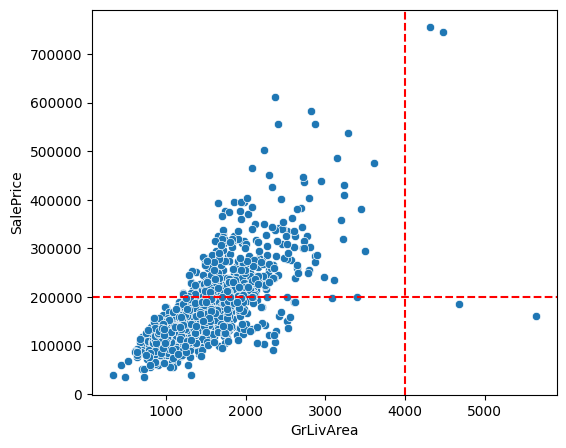

In [20]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=train_df['GrLivArea'],
    y=train_df['SalePrice']
)
plt.axvline(4000, color='r', linestyle='--')
plt.axhline(200000, color='r', linestyle='--')

plt.show()

In [21]:
outlier_condition = (
    (train_df['GrLivArea'] > 4000) &
    (train_df['SalePrice'] < 200000)
)

train_df.loc[outlier_condition]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
64,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,None,None,0,1,2008,New,Partial,160000
373,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,0,None,None,None,0,10,2007,New,Partial,184750


In [22]:
train_df = train_df.loc[~outlier_condition].reset_index(drop=True)

### 변수별 인코딩 진행.

In [28]:
## 순서형 범주 변수 -> 숫자 매핑 Ordinal Encoding

qual_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0
}

ordinal_cols = [
    'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond',
    'HeatingQC',
    'KitchenQual',
    'FireplaceQu',
    'GarageQual', 'GarageCond'
]

for col in ordinal_cols:
    train_df[col] = train_df[col].map(qual_mapping)
    test_df[col] = test_df[col].map(qual_mapping)

In [29]:
## 명목형 번주 변슈 -> One-Hot Encoding

train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# 컬럼 정렬 맞추기
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

### 모델 설정 및 학습

In [42]:
from sklearn.model_selection import train_test_split

# target log 변환.
X = train_df.drop("SalePrice", axis=1)
y = np.log1p(train_df["SalePrice"])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Baseline - LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 0.11857809149256998


#### 2. Ridge Model

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor

ridge = Ridge(alpha=10, random_state=42)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 0.11029181862397437


#### 3. Gradientboosting

In [45]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 0.1183482120192214


#### 4. lr + ridge + gb - 단순 평균 앙상블

In [56]:
# log 스케일 예측
test_pred_lr_log = lr.predict(test_df)
test_pred_ridge_log = ridge.predict(test_df)
test_pred_gb_log = gb.predict(test_df)

# 원래 SalePrice 스케일로 복원
test_pred_lr = np.expm1(test_pred_lr_log)
test_pred_ridge = np.expm1(test_pred_ridge_log)
test_pred_gb = np.expm1(test_pred_gb_log)

test_pred_ensemble = (test_pred_lr + test_pred_ridge + test_pred_gb) / 3

In [57]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred_ensemble
})
submission.to_csv("ensemble_v1.csv", index=False)

- LR : 31808
- Ridge : 20835
- GB : 25293
- Ensembel : 23291

=> 지금까지 비교 결과, Ridge model 성능이 가장 높게 나옴
- 아무래도 데이터가 고차원, 다중공선성, 비교적 선형적인 구조(로그 변환 때문에) 이기에,  L2규제로 계수를 고르게 나눠 가지며 모든 변수를 살리되 크기만 줄이는 방식이기에 Ridge Model 성능이 가장 높게 나온 것 같다.

=> Ridge 모델을 사용하기로 결정 + 모델 튜닝 시작

#### 5. Ridge Model - tuning_01

In [59]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def ridge_cv_rmse(X, y, alphas, n_splits=5, seed=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    results = []

    for a in alphas:
        rmses = []
        for tr_idx, va_idx in kf.split(X):
            X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
            y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

            model = Ridge(alpha=a, random_state=42)
            model.fit(X_tr, y_tr)
            pred = model.predict(X_va)

            rmse = np.sqrt(mean_squared_error(y_va, pred))
            rmses.append(rmse)

        results.append((a, float(np.mean(rmses)), float(np.std(rmses))))

    # 평균 RMSE가 가장 낮은 alpha 선택
    results.sort(key=lambda x: x[1])
    return results

alphas = np.logspace(-3, 3, 25)  # 0.001 ~ 1000
results = ridge_cv_rmse(X, y, alphas, n_splits=5)

best_alpha, best_rmse, best_std = results[0]
print("Best alpha:", best_alpha)
print("CV RMSE mean/std:", best_rmse, best_std)

Best alpha: 10.0
CV RMSE mean/std: 0.11776673829190196 0.012145729609610613


In [60]:
best_ridge = Ridge(alpha=best_alpha, random_state=42)
best_ridge.fit(X, y)  # 전체 train으로 재학습(로그 타겟)

test_pred_log = best_ridge.predict(test_df)
test_pred = np.expm1(test_pred_log)

submission = pd.DataFrame({"Id": test_df["Id"], "SalePrice": test_pred})
submission.to_csv("ridge_v3.csv", index=False)


#### 6. Ridge Model - tuning_02
- RobustScaler 추가 적용

In [62]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

# 0) X, y (y는 log1p 유지)
y = np.log1p(train_df["SalePrice"])
X = train_df.drop(columns=["SalePrice"])

# 1) 타입 분리
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

# 2) 수치형: 중앙값 대치 -> log1p -> RobustScaler
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log1p", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
    ("scaler", RobustScaler())
])

# 3) 범주형: 최빈값 대치 -> OneHot
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols),
    ]
)

model = Ridge(alpha=10.0, random_state=42)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

# 4) CV 평가 - 로그 스케일
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []

for tr_idx, va_idx in kf.split(X):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    pipe.fit(X_tr, y_tr)
    pred = pipe.predict(X_va)

    rmse = np.sqrt(mean_squared_error(y_va, pred))
    rmses.append(rmse)

print("CV RMSE mean/std (log scale):", float(np.mean(rmses)), float(np.std(rmses)))


CV RMSE mean/std (log scale): 0.13340963928417743 0.010023676814526499


In [63]:
pipe.fit(X, y)

test_pred_log = pipe.predict(test_df)
test_pred = np.expm1(test_pred_log)

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})
submission.to_csv("ridge_v4.csv", index=False)

#### 7. Ridge Model - tuning_03
- 기존 + 수치형 변수 중 일부만 log 적용 ('0'이 의미인 변수는 건들이지 않고 진행하기 위함.)

In [64]:
import numpy as np
import pandas as pd

# 타겟 분리
y = np.log1p(train_df["SalePrice"])
X = train_df.drop(columns=["SalePrice"])

# 수치형 컬럼
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# 0이 의미인 컬럼들(대표 예시) — 필요 시 추가/조정
zero_meaning_cols = [
    'PoolArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'LowQualFinSF',
    'GarageArea', 'GarageCars',
    'BsmtFinSF2', 'BsmtUnfSF'
]

# 왜도 계산 (결측은 중앙값 대치 후 계산)
skewness = X[num_cols].fillna(X[num_cols].median()).skew()

# log1p 적용 대상: 왜도 크고, 0-의미 컬럼 제외
log_candidates = skewness[skewness.abs() >= 0.75].index.tolist()
log_cols = [c for c in log_candidates if c not in zero_meaning_cols]

print("log1p 적용 컬럼 수:", len(log_cols))
print(log_cols[:10])

log1p 적용 컬럼 수: 17
['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', '1stFlrSF']


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# 파이프라인 정의
num_log_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log1p", FunctionTransformer(np.log1p, feature_names_out="one-to-one")),
    ("scaler", RobustScaler())
])

num_plain_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num_log", num_log_pipeline, log_cols),
        ("num_plain", num_plain_pipeline, [c for c in num_cols if c not in log_cols]),
        ("cat", cat_pipeline, X.select_dtypes(include=["object"]).columns),
    ]
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", Ridge(alpha=10.0, random_state=42))
])

In [67]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmses = []

for tr, va in kf.split(X):
    pipe.fit(X.iloc[tr], y.iloc[tr])
    pred = pipe.predict(X.iloc[va])
    rmse = np.sqrt(mean_squared_error(y.iloc[va], pred))
    rmses.append(rmse)

print("CV RMSE (log):", float(np.mean(rmses)), float(np.std(rmses)))

CV RMSE (log): 0.12685044148403124 0.009437798929450675


In [68]:
pipe.fit(X, y)
test_pred = np.expm1(pipe.predict(test_df))

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})
submission.to_csv("ridge_v5.csv", index=False)

#### 8. ridge_tuning01 + GB

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gb_strong = GradientBoostingRegressor(
    n_estimators=2000,      # 충분히 크게
    learning_rate=0.02,    # 작게
    max_depth=3,           # 과적합 방지
    subsample=0.7,         # 일반화
    max_features=0.7,
    random_state=42
)

gb_strong.fit(X_train, y_train)

y_pred = gb_strong.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("GB tuned RMSE:", rmse)


GB tuned RMSE: 0.12075630178961812


In [70]:
# 모델 전체 학습

gb_strong = GradientBoostingRegressor(
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=3,
    subsample=0.7,
    max_features=0.7,
    random_state=42
)

gb_strong.fit(X, y)

GradientBoostingRegressor(learning_rate=0.02, max_features=0.7,
                          n_estimators=2000, random_state=42, subsample=0.7)

In [71]:
test_pred_log = gb_strong.predict(test_df)
test_pred = np.expm1(test_pred_log)

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})

submission.to_csv("gb_tuned_v1.csv", index=False)

In [73]:
## ridge + gb - 가중 앙상블

# Ridge 예측
test_pred_ridge_log = best_ridge.predict(test_df)
test_pred_ridge = np.expm1(test_pred_ridge_log)

# GB 예측
test_pred_gb_log = gb_strong.predict(test_df)
test_pred_gb = np.expm1(test_pred_gb_log)

In [74]:
# Ridge 80% + GB 20%
test_pred_ensemble = (
    0.8 * test_pred_ridge +
    0.2 * test_pred_gb
)

In [75]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred_ensemble
})

submission.to_csv("ensembel_ridge80_gb20.csv", index=False)

- Linear Regression, Ridge Regression, Gradient Boosting 모델을 학습하여 성능을 비교함.

- 단일 모델 대비 성능 향상을 위해 Ridge와 Gradient Boosting 예측을 결합한 가중 앙상블을 적용.

- Ridge Regression의 규제 강도(alpha)를 교차검증으로 탐색함. (최적 alpha=10).


=> Ridge 단독 모델이 가장 안정적인 성능을 보였으나,
Gradient Boosting 예측을 20% 비중으로 결합한 가중 앙상블에서
최종적으로 가장 낮은 RMSE를 기록함!

---
### 1. 문제 정의 및 목표

본 프로젝트의 목표는 Ames 주택 데이터를 활용하여 주택 판매 가격인 ScalePrice를 예측하는 회귀 모델을 구축하는 것이다.

대회 평가 지표는 RMSE이고, 목표 성능은 RMSE 20000 미만을 달성하는 것이었다.

---
### 2. 데이터 탐색 및 Target 분석

SalePrice 분포를 시각화한 결과, 오른쪽으로 긴 꼬리를 가진 강한 양의 왜도 분포임을 확인했다.

-> 모델이 고가 주택에 과도하게 민감해지는 문제를 완화하기 위해 Target 변수에 log1p 로그 변환을 적용하였다.

=> 이를 통해 극닶의 영향이 완화되고, 가격 대비 상대적인 오차를 줄이는 방향으로 학습이 가능해졌다.

---
### 3. 결측치 및 이상치 처리

결측치 분석 결과 일부 변수(PoolQC 등)의 결측 비율이 매우 높았으나,
이는 데이터 누락으로 보는게 아니라 해당 시설이 존재하지 않음을 의미하는 구조적 결측치임을 확인하였다.

-> 단순 컬럼 제거가 아니라, 의미를 유지할 수 있도록 "None"이라는 값으로 채워 결측치를 처리했다.

집 면적 대비 가격이 비정상적으로 낮은 몇몇 샘플을 확인하고, 이 샘플들이 모델 학습을 방해하는 이상치로 판단하여 제거했다.

---
### 4. Baseline / Model 비교
(1) Baseline: Linear Regression

단순 선형 모델을 기준선으로 설정

RMSE ≈ 31,800

고차원 One-Hot 데이터와 다중공선성 문제로 성능 한계 확인

(2) Ridge Regression

L2 규제를 통해 다중공선성 문제 완화

교차검증을 통해 alpha=10이 최적임을 확인

RMSE ≈ 20,519

→ 단일 모델 중 가장 안정적이고 우수한 성능

(3) Gradient Boosting Regressor

비선형 관계 학습을 위해 트리 기반 모델 도입

하이퍼파라미터 튜닝 후 RMSE ≈ 21,685

Ridge보다는 성능이 낮았으나, 다른 오차 패턴을 보임

---
### 5. 앙상블 실험

단순 평균 앙상블을 시도했으나 오히려 Ridge의 강점이 희석되어 성능이 하락함을 알 수 있었다.

Ridge 80% + GB 20% 가중 앙상블을 시도했을 때, 성능이 가장 좋게 나옴을 확인하였다.

-> 이를 통해, 앙상블은 모든 모델을 동일하게 섞는 것이 아니라 각 모델의 역할 및 강점을 고려해야 한다는 것을 다시 한번 느끼게 되었다.

---
### 6. 최종 Model - 가중 앙상블
- Ridge 80% + Gradient Boosting 20%의 가중 앙상블 적용

-> Ridge의 안정성을 유지하면서도

-> GB가 포착한 비선형 관계를 조금 보완하는 구조.

### 테스트 데이터 예측 및 제출

In [50]:
# train/test 컬럼 차이 맞추기
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 예측
test_pred = gb.predict(test_df)
test_pred = np.expm1(test_pred)

In [51]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})
submission.to_csv("gb_v1.csv", index=False)